In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# from google.colab import drive
# drive.mount("/content/drive")

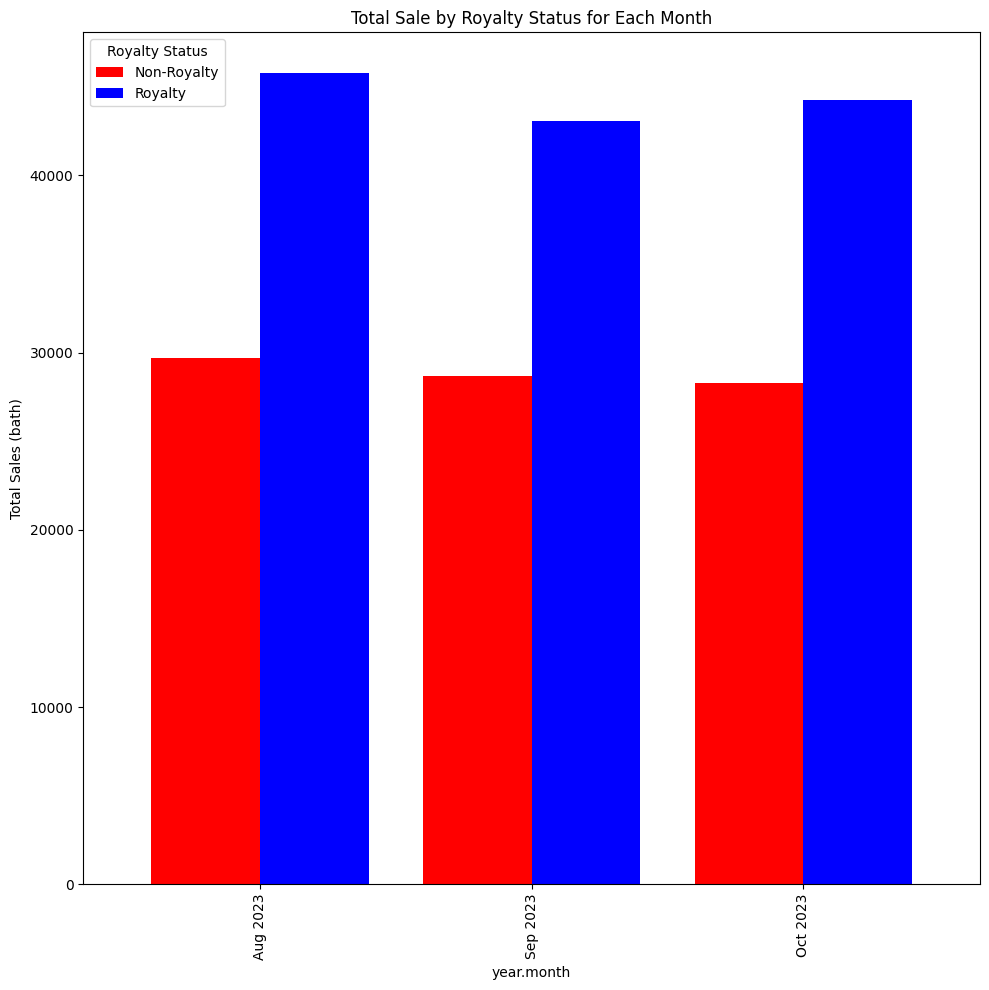

In [10]:
# ---
# Group No. 13
# 1. อชิระ ชัชวาลย์6210450385
# 2. อภิสิทธิ์ แสงสารพันธ์ 6210450393
# 3. รัศมีดาว สุทธิศรี 6210450971

group = 13 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
from pandas.tseries.offsets import MonthBegin
data.fillna('No Data', inplace=True)
data['royalty_number'] = pd.to_numeric(data['royalty_number'], errors='coerce').fillna(0).astype(bool)
data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=True)
data.dropna(subset=['date'], inplace=True)  # Ensure there are no NaT values
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['total_sale'] = data['total_sale'].astype(float)
data = data.groupby(['year', 'month', 'royalty_number'])['total_sale'].sum().reset_index()

# Create a 'month_year' column that combines the 'month' and 'year' for labeling
data['month_year'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)
data['month_year'] = pd.to_datetime(data['month_year'], format='%Y-%m') + MonthBegin(n=1)

data = data.sort_values('month_year')
data_pivot = data.pivot(index='month_year', columns='royalty_number', values='total_sale')

color_palette = ['r', 'b']

ax = data_pivot.plot(kind='bar', color=color_palette, width=0.8, figsize=(10, 10))

plt.title('Total Sale by Royalty Status for Each Month')
plt.xlabel('year.month')
plt.ylabel('Total Sales (bath)')
ax.set_xticklabels([x.strftime('%b %Y') for x in data_pivot.index], rotation=90)
plt.legend(['Non-Royalty', 'Royalty'], title='Royalty Status')
plt.tight_layout()

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()